### EDA: 2019 Taxi Data

In [14]:
## Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium 

import datetime as dt
# from datetime import datetime



In [2]:
## Reading in cleaned file
taxi_2019 = pd.read_csv('./data/taxi_2019_clean.csv')

In [3]:
taxi_2019.head()

,Unnamed: 0,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,month,year,pickup_day_of_week,dropoff_day_of_week,pickup_hour,dropoff_hour,pickup_timeofday,pickup_borough,dropoff_borough,zone
0,68268,1.0,2019-01-01 07:01:20,2019-01-31 14:29:21,1.0,1.2,1.0,N,48,163,...,jan,2019,Tuesday,Thursday,7,14,Morning,Manhattan,Manhattan,Clinton East
1,579459,1.0,2019-01-03 21:43:46,2019-01-03 21:45:47,1.0,0.6,1.0,N,263,141,...,jan,2019,Thursday,Thursday,21,21,Evening,Manhattan,Manhattan,Yorkville West
2,579460,1.0,2019-01-03 21:49:22,2019-01-03 21:59:12,1.0,2.2,1.0,N,263,151,...,jan,2019,Thursday,Thursday,21,21,Evening,Manhattan,Manhattan,Yorkville West
3,592224,1.0,2019-01-03 22:04:40,2019-01-03 22:16:15,1.0,2.5,1.0,N,238,246,...,jan,2019,Thursday,Thursday,22,22,Late night,Manhattan,Manhattan,Upper West Side North
4,592225,1.0,2019-01-03 22:24:36,2019-01-27 10:41:17,1.0,1.1,1.0,N,50,170,...,jan,2019,Thursday,Sunday,22,10,Late night,Manhattan,Manhattan,Clinton West


In [4]:
taxi_2019 = taxi_2019.drop(columns='Unnamed: 0')

In [5]:
## Nulls make up 3% of rider data in 2020. Better to drop as it is not a significant amount of info.
## Additionally, this could be due to drivers taking rides off the record which happens ever so often.

In [5]:
taxi_2019.isna().sum()

VendorID                   0
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_distance              0
RatecodeID                 0
store_and_fwd_flag         0
PULocationID               0
DOLocationID               0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
congestion_surcharge       0
month                      0
year                       0
pickup_day_of_week         0
dropoff_day_of_week        0
pickup_hour                0
dropoff_hour               0
pickup_timeofday           0
pickup_borough             0
dropoff_borough            0
zone                     331
dtype: int64

In [7]:
taxi_2019.dropna(inplace=True)

In [14]:
taxi_2019.tail()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_day_of_week,dropoff_day_of_week,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,trip_time,pickup_borough,dropoff_borough,zone
33050205,1.0,2019-06-02 17:41:35,2019-06-02 17:45:08,1.0,0.5,1.0,N,239,143,1.0,...,Sunday,Sunday,17,17,Evening,Evening,0 days 00:03:33,Manhattan,Manhattan,Upper West Side South
33050206,1.0,2019-06-02 17:54:34,2019-06-02 18:02:15,1.0,1.6,1.0,N,142,236,1.0,...,Sunday,Sunday,17,18,Evening,Evening,0 days 00:07:41,Manhattan,Manhattan,Lincoln Square East
33050207,1.0,2019-06-02 17:08:31,2019-06-02 17:13:41,2.0,0.8,1.0,N,161,43,2.0,...,Sunday,Sunday,17,17,Evening,Evening,0 days 00:05:10,Manhattan,Manhattan,Midtown Center
33050208,1.0,2019-06-02 17:15:02,2019-06-02 17:19:13,1.0,0.7,1.0,N,142,43,1.0,...,Sunday,Sunday,17,17,Evening,Evening,0 days 00:04:11,Manhattan,Manhattan,Lincoln Square East
33050209,1.0,2019-06-02 17:24:54,2019-06-02 17:28:13,2.0,0.3,1.0,N,142,142,1.0,...,Sunday,Sunday,17,17,Evening,Evening,0 days 00:03:19,Manhattan,Manhattan,Lincoln Square East


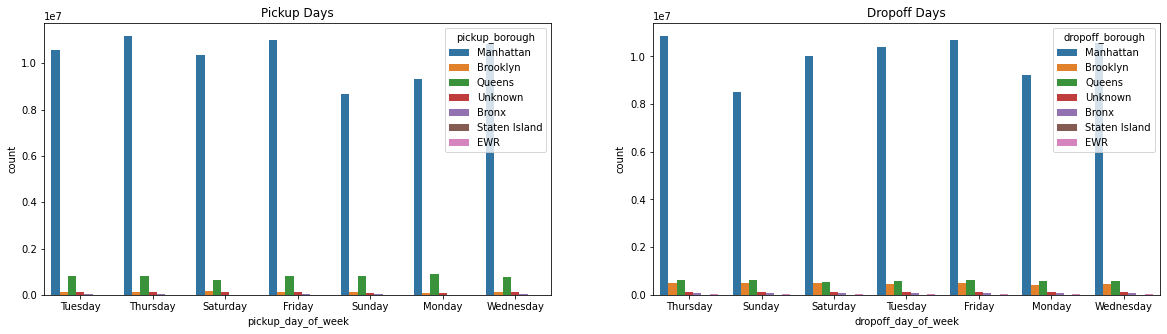

In [18]:
## Passenger Count by Pickup Day
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(data=taxi_2019, x='pickup_day_of_week', hue='pickup_borough', ax=ax1);

## Passenger Count by Dropoff Days
ax2.set_title('Dropoff Days')
ax=sns.countplot(data=taxi_2019, x='dropoff_day_of_week', hue='dropoff_borough', ax=ax2);
# sns.countplot(x="dropoff_day_of_week",data=taxi_2019,ax=ax2)

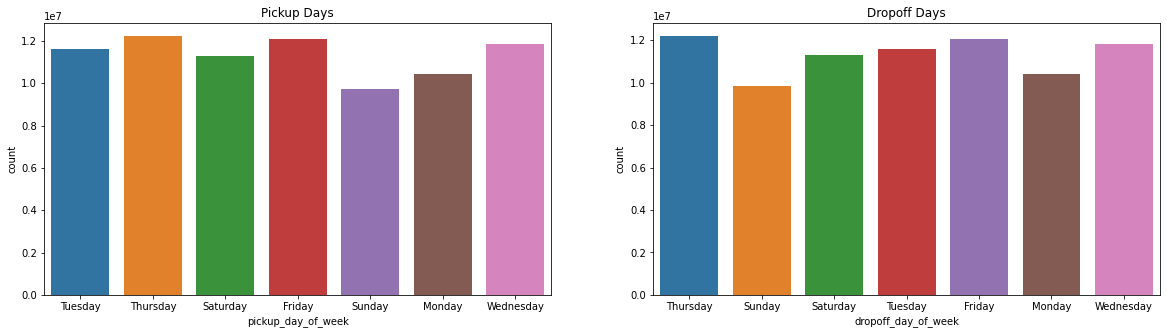

In [20]:
## Passenger Count by Pickup Day
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(data=taxi_2019, x='pickup_day_of_week', ax=ax1);

## Passenger Count by Dropoff Days
ax2.set_title('Dropoff Days')
ax=sns.countplot(data=taxi_2019, x='dropoff_day_of_week', ax=ax2);
# sns.countplot(x="dropoff_day_of_week",data=taxi_2019,ax=ax2)

ValueError: Could not interpret input 'dropoff_timeofday'

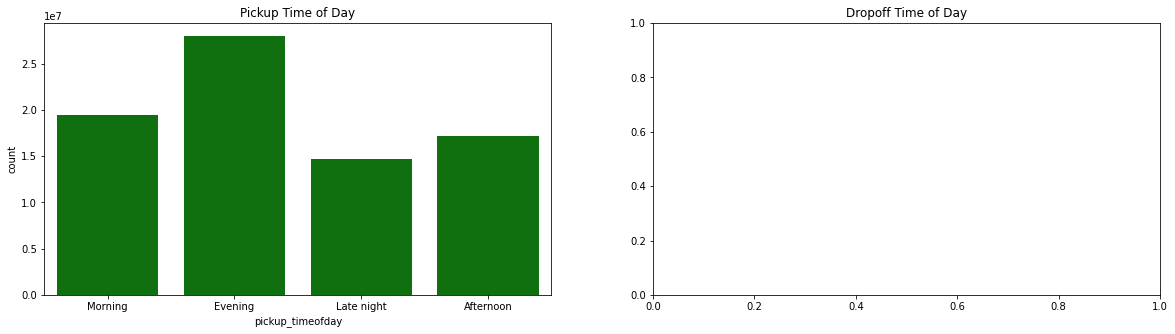

In [19]:
## Picked up trips by time of day
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=taxi_2019,ax=ax1, color='green');

## Dropoff trips by time of day
ax2.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=taxi_2019,ax=ax2, color='green');

In [20]:
## Taxis are hailed predominantly in the evening hours

In [22]:
# Dihistplotnce of trips by Time of day
# sns.lineplot(x='pickup_timeofday',y='trip_distance',data=taxi_2019)

In [23]:
# Don't want to look at any trips over 100 mile radius of NYC
taxi_2019 = taxi_2019.drop((taxi_2019.loc[taxi_2019['trip_distance'] > 100]).index)

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

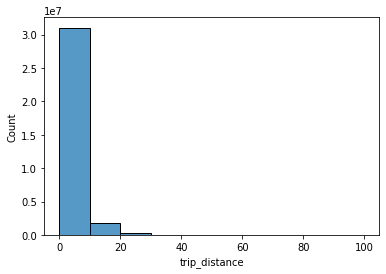

In [24]:
sns.histplot(taxi_2019['trip_distance'], bins= 10)

In [21]:
taxi_2019.loc[taxi_2019['trip_distance'] == 0].shape

(705044, 28)

There are 705k rides where the trip distance is 0. 
The reasons for 0 km distance can be:

- The dropoff location couldn’t be tracked.
- The driver deliberately took this ride to complete a target ride number.
- The passengers canceled the trip.


In [22]:
## Dropping these 
taxi_2019 = taxi_2019[taxi_2019['trip_distance'] != 0]

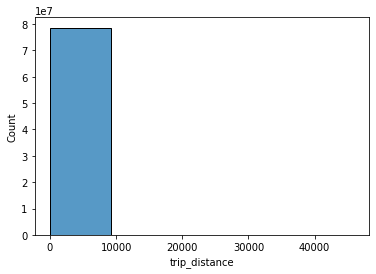

In [24]:
sns.histplot(taxi_2019['trip_distance'], bins= 5);

In [ ]:
## majority of rides are under a mile

''

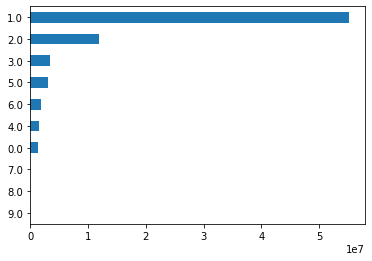

In [28]:
## Passenger count per ride
taxi_2019['passenger_count'].value_counts(ascending=True).plot(kind='barh')
;

In [29]:
##excluding rows over 6 passengers and 0 passengers
taxi_2019 = taxi_2019[taxi_2019['passenger_count'] <= 6]
taxi_2019 = taxi_2019[taxi_2019['passenger_count'] != 0]

In [30]:
taxi_2019['passenger_count'].value_counts(ascending=False)

1.0    55117440
2.0    11990314
3.0     3361109
5.0     3179707
6.0     1905716
4.0     1604526
Name: passenger_count, dtype: int64

''

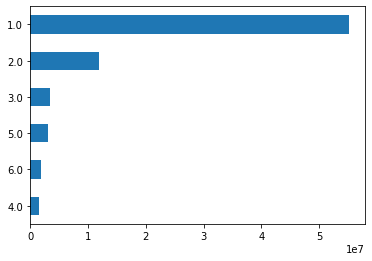

In [31]:
## Passenger count per ride
taxi_2019['passenger_count'].value_counts(ascending=True).plot(kind='barh')
;

In [32]:
#saving file again after additional cleaning
taxi_2019.to_csv('data/taxi_2019_clean_2.csv')

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

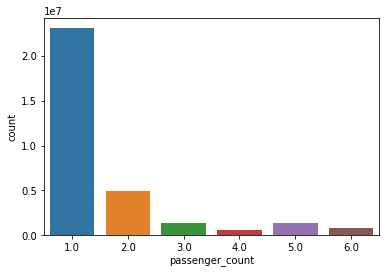

In [50]:
sns.countplot(x='passenger_count',data=taxi_2019)

In [51]:
## Majority of rides are hailed by paties of 1

In [54]:
taxi_2019.dtypes

VendorID                 float64
pickup_datetime           object
dropoff_datetime          object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
month                     object
year                       int64
pickup_day_of_week        object
dropoff_day_of_week       object
pickup_hour                int64
dropoff_hour               int64
pickup_timeofday          object
dropoff_timeofday         object
trip_time                 object
pickup_borough            object
dropoff_borough           object
zone                      object
dtype: obj

In [ ]:
## Looking at distances 
plt.figure(figsize=(12,8))
(taxi_2019['trip_distance'].value_counts(ascending=False)).plot(kind= 'hist', bins=50)

In [2]:
## sns.lineplot(y='trip_time',x='pickup_timeofday',data=taxi_2019)
## Reloading cleaned_2 file

taxi_2019 = pd.read_csv('./data/taxi_2019_clean_2.csv')


In [3]:
taxi_2019['pickup_datetime'] = pd.to_datetime(taxi_2019['pickup_datetime'])

In [4]:


taxi_2019 = taxi_2019.set_index(pd.DatetimeIndex(taxi_2019['pickup_datetime']))

In [5]:
taxi_2019.head(2)

,Unnamed: 0,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,pickup_day_of_week,dropoff_day_of_week,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,trip_time,pickup_borough,dropoff_borough,zone
pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 07:01:20,0,1.0,2019-01-01 07:01:20,2019-01-31 14:29:21,1.0,1.2,1.0,N,48,163,...,Tuesday,Thursday,7,14,Morning,Afternoon,30 days 07:28:01,Manhattan,Manhattan,Clinton East
2019-01-03 21:43:46,1,1.0,2019-01-03 21:43:46,2019-01-03 21:45:47,1.0,0.6,1.0,N,263,141,...,Thursday,Thursday,21,21,Evening,Evening,0 days 00:02:01,Manhattan,Manhattan,Yorkville West


In [6]:
taxi_2019 = taxi_2019.sort_index()

In [12]:
taxi_2019.shape

(32234031, 31)

In [30]:
taxi_2019['month'].value_counts()

mar    7640788
may    7367221
apr    7247399
feb    6852381
jan    2747691
jun     378551
Name: month, dtype: int64

In [ ]:
32_233_783

In [74]:
taxi_2020['tpep_pickup_datetime'] = pd.to_datetime

0          2020-01-01 00:28:15
1          2020-01-01 00:35:39
2          2020-01-01 00:47:41
3          2020-01-01 00:55:23
4          2020-01-01 00:01:58
                  ...         
1362436    2020-12-31 23:05:33
1362437    2020-12-31 22:57:20
1362438    2020-12-31 23:40:35
1362439    2020-12-31 23:54:57
1362440    2020-12-31 23:11:16
Name: tpep_pickup_datetime, Length: 23838931, dtype: object

In [ ]:
## need to extract time and bin hours of the day

<AxesSubplot:>

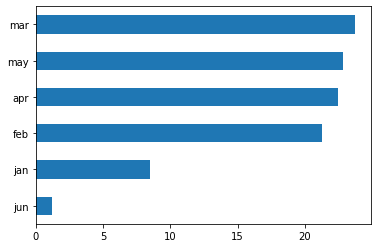

In [31]:
## Top rider months by percentage.
(taxi_2019['month'].value_counts(ascending=True, normalize=True)*100).plot(kind='barh')

In [ ]:
## Higher amounts of taxi riders in the first two months of the year. I wonder how tourism affects this. They may be taking subway or apps like Uber/Lyft

In [8]:
## Reading in shapefile

sf = gpd.read_file('./data/taxi_zones/')


In [9]:
sf.shape

(263, 7)

In [60]:
# geo_df = sf.merge(taxi_2019, on='zone')

In [ ]:
geo_df['passenger_count'].shape

In [ ]:
## checking dtype
type(geo_df)

In [ ]:
geo_df.head()

In [ ]:
geo_df.columns

In [ ]:
## Passenger pickups by day of the week total

geo_df.groupby(by=['pickup_day_of_week']).sum().sort_values(by='passenger_count',
                                                            ascending=False)['passenger_count'][:10].plot(kind='bar', cmap='Accent')
